https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

In [1]:
import pandas as pd
df_a = pd.read_csv("application_record.csv")
df_c = pd.read_csv("credit_record.csv")

### Q1. 각 데이터 파일의 row 개수와 column 개수를 확인하시오.

In [2]:
df_a.shape

(438557, 18)

In [3]:
df_c.shape

(1048575, 3)

In [10]:
df_a.head(2)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
2              2.0  
3              1.0

### Q2. 각 변수의 결측치 개수를 확인하시오.
※ 분석 데이터는 application_record.csv 파일을 대상으로 한다.  
※ 결측치가 있는 경우 결측치가 포함된 행(row)를 제거하고 향후 해당 객체를 기준으로 분석을 실시하시오.

In [5]:
df_a["OCCUPATION_TYPE"].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [4]:
df_a.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
df_a = df_a.dropna()

In [7]:
len(df_a)

304354

### Q3. 각 변수의 결측치 개수를 확인하시오.
※ 분석 데이터는 credit_record.csv 파일을 대상으로 한다.  
※ 결측치가 있는 경우 결측치가 포함된 행(row)를 제거하고 향후 해당 객체를 기준으로 분석을 실시하시오.

In [8]:
df_c.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [9]:
df_c.head(2)

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0

### Q4. ID는 각 고객의 고유 식별자이다. 총 몇명의 데이터가 있는가?
※ 분석 데이터는 application_record.csv 파일을 대상으로 한다.

In [11]:
df_a.head(2)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
2              2.0  
3              1.0

In [12]:
df_a["ID"].nunique()

304331

In [13]:
len(df_a)

304354

### Q5. 한 사람의 데이터가 두 번 이상 기록된 경우가 있는가?
※ 분석 데이터는 application_record.csv 파일을 대상으로 한다.  
※ 한 사람의 데이터가 두 번 이상 기록되어 있는 경우 최초 1개를 제외한 나머지는 제거하시오.

In [14]:
df_a["ID"].nunique() != len(df_a)

True

In [15]:
df_a_id_cnt = df_a["ID"].value_counts()
df_a_id_cnt.head()

7023651    2
7137299    2
7243768    2
7742853    2
7213374    2
Name: ID, dtype: int64

In [16]:
df_a.loc[df_a["ID"] == 7023651, ]

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
421907  7023651           M            Y               N             1   
425306  7023651           F            N               N             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
421907          157500.0  Commercial associate   Incomplete higher   
425306          225000.0  Commercial associate   Incomplete higher   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
421907               Married  House / apartment      -10521          -1457   
425306  Single / not married  House / apartment      -10229          -1209   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
421907           1                0           0           0         Drivers   
425306           1                0           0           0     Accountants   

        CNT_FAM_MEMBERS  
421907              3.0  
425306              1.0

In [17]:
df_a.loc[df_a["ID"] == 7023651, ].head(1)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
421907  7023651           M            Y               N             1   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
421907          157500.0  Commercial associate   Incomplete higher   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
421907            Married  House / apartment      -10521          -1457   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
421907           1                0           0           0         Drivers   

        CNT_FAM_MEMBERS  
421907              3.0

In [21]:
# df_a_id_cnt[df_a_id_cnt >= 2].index.to_list()
id_dup = df_a_id_cnt[df_a_id_cnt >= 2].index
id_dup 

Int64Index([7023651, 7137299, 7243768, 7742853, 7213374, 7036518, 7022327,
            7836711, 7317997, 7636756, 7154598, 7618285, 7089090, 7052812,
            7053557, 7023108, 7050948, 7702516, 7744386, 7702238, 7636389,
            7024111, 7052783],
           dtype='int64')

In [23]:
df_a_id_dup = df_a.loc[df_a["ID"].isin(id_dup), ]
df_a_id_dup = df_a_id_dup.sort_values("ID").reset_index(drop = True)
df_a_id_dup.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  7022327           F            N               Y             0   
1  7022327           M            Y               Y             0   
2  7023108           F            N               N             0   
3  7023108           M            Y               Y             1   
4  7023651           F            N               N             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          135000.0  Commercial associate  Secondary / secondary special   
1          256500.0  Commercial associate               Higher education   
2          135000.0               Working  Secondary / secondary special   
3           67500.0               Working  Secondary / secondary special   
4          225000.0  Commercial associate              Incomplete higher   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment      -14771          -5298   
1               Married  House / apartment      -21503          -1674   
2               Married  House / apartment      -17590          -1273   
3               Married  House / apartment      -15156          -1696   
4  Single / not married  House / apartment      -10229          -1209   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  \
0           1                0           0           0  High skill tech staff   
1           1                0           0           1             Core staff   
2           1                0           0           0         Cleaning staff   
3           1                1           0           0             Core staff   
4           1                0           0           0            Accountants   

   CNT_FAM_MEMBERS  
0              1.0  
1              2.0  
2              2.0  
3              3.0  
4              1.0

In [ ]:
# head(1)

In [27]:
df_a.groupby("CODE_GENDER")["DAYS_BIRTH"].min()

CODE_GENDER
F   -24754
M   -24770
Name: DAYS_BIRTH, dtype: int64

In [24]:
df_a2 = df_a.groupby("ID").head(1)

In [25]:
len(df_a2) == df_a2["ID"].nunique()

True

In [26]:
len(df_a2)

304331

### Q6. 앞에서 정제한 두 데이터 세트를 사용하여 공통 ID를 기준으로 하나로 합쳐서 df_join 객체에 저장하시오.
※ pd.merge() 또는 데이터프레임 객체의 .merge() 메서드를 사용하시오.  
※ 향후 문제는 df_join 객체를 사용하여 풀이하시오.

In [30]:
df_c.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [31]:
df_join = df_a.merge(df_c, on = "ID", how = "inner")
df_join.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008806           M            Y               Y             0   
1  5008806           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008806           M            Y               Y             0   
4  5008806           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          112500.0          Working  Secondary / secondary special   
1          112500.0          Working  Secondary / secondary special   
2          112500.0          Working  Secondary / secondary special   
3          112500.0          Working  Secondary / secondary special   
4          112500.0          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0            Married  House / apartment      -21474          -1134   
1            Married  House / apartment      -21474          -1134   
2            Married  House / apartment      -21474          -1134   
3            Married  House / apartment      -21474          -1134   
4            Married  House / apartment      -21474          -1134   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                0           0           0  Security staff   
1           1                0           0           0  Security staff   
2           1                0           0           0  Security staff   
3           1                0           0           0  Security staff   
4           1                0           0           0  Security staff   

   CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  
0              2.0               0      C  
1              2.0              -1      C  
2              2.0              -2      C  
3              2.0              -3      C  
4              2.0              -4      C

In [32]:
len(df_join)

537667

In [33]:
df_join["ID"].nunique()

25134

### Q7. 이진 변수로 추정되는 변수의 개수는 몇 개인가?

In [34]:
df_join.head(2)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008806           M            Y               Y             0   
1  5008806           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          112500.0          Working  Secondary / secondary special   
1          112500.0          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0            Married  House / apartment      -21474          -1134   
1            Married  House / apartment      -21474          -1134   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                0           0           0  Security staff   
1           1                0           0           0  Security staff   

   CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  
0              2.0               0      C  
1              2.0              -1      C

In [35]:
df_join.nunique()

ID                     25134
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         195
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              5206
DAYS_EMPLOYED           3299
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     8
dtype: int64

In [36]:
df_join["CODE_GENDER"].unique()

array(['M', 'F'], dtype=object)

In [37]:
df_join["STATUS"].unique()

array(['C', 'X', '0', '1', '5', '4', '3', '2'], dtype=object)

In [38]:
df_join["NAME_HOUSING_TYPE"].unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [39]:
df_join["NAME_EDUCATION_TYPE"].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [40]:
df_join["NAME_FAMILY_STATUS"].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [42]:
df_join_sub = df_join.loc[df_join["NAME_FAMILY_STATUS"] == "Widow", ]
df_join_sub["CODE_GENDER"].unique()

array(['F', 'M'], dtype=object)

In [43]:
df_join["NAME_INCOME_TYPE"].unique()

array(['Working', 'Commercial associate', 'State servant', 'Student',
       'Pensioner'], dtype=object)

In [44]:
(df_join.nunique() == 2).sum()

6

In [46]:
df_join_check = df_join.nunique()
df_join_check = df_join_check[df_join_check == 2]
df_join_check

CODE_GENDER        2
FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
FLAG_WORK_PHONE    2
FLAG_PHONE         2
FLAG_EMAIL         2
dtype: int64

In [48]:
col_bi_list = df_join_check.index.to_list()
col_bi_list

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

### Q8. 이진 변수로 판단되는 변수의 원소를 전부 0과 1로 가변수 처럼 변환하시오.

In [56]:
import numpy as np

In [57]:
ser = pd.Series(["M", "M", "F", "F"])

In [58]:
ser == "M"

0     True
1     True
2    False
3    False
dtype: bool

In [59]:
np.where(ser == "M", 1, 0)

array([1, 1, 0, 0])

In [61]:
(ser == "M").astype("int")

0    1
1    1
2    0
3    0
dtype: int32

In [62]:
(ser == "M") + 0

0    1
1    1
2    0
3    0
dtype: int32

In [64]:
(ser == "M") * 1

0    1
1    1
2    0
3    0
dtype: int32

In [68]:
df_sample = pd.DataFrame(dict(gen = ["M", "F"]))
pd.concat([df_sample, pd.get_dummies(df_sample)], axis = 1)

gen  gen_F  gen_M
0   M      0      1
1   F      1      0

In [67]:
pd.get_dummies(df_sample, drop_first = True) 

gen_M
0      1
1      0

In [47]:
df_join["CODE_GENDER"] = (df_join["CODE_GENDER"] == "M") + 0
df_join["CODE_GENDER"].unique()

array([1, 0])

In [49]:
df_join_bi = df_join[col_bi_list]
df_join_bi.head(2)

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_WORK_PHONE  FLAG_PHONE  \
0            1            Y               Y                0           0   
1            1            Y               Y                0           0   

   FLAG_EMAIL  
0           0  
1           0

In [50]:
df_join_bi_dum = pd.get_dummies(df_join_bi, drop_first = True)
df_join_bi_dum.head(2)

CODE_GENDER  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  FLAG_OWN_CAR_Y  \
0            1                0           0           0               1   
1            1                0           0           0               1   

   FLAG_OWN_REALTY_Y  
0                  1  
1                  1

In [54]:
df_join_bi_dum.columns = df_join_bi_dum.columns.str.replace(pat = "_Y$", # _Y 로 끝나는~
                                                            repl = "", 
                                                            regex = True)
df_join_bi_dum.columns

Index(['CODE_GENDER', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'],
      dtype='object')

In [55]:
df_join = pd.concat([df_join.drop(col_bi_list, axis = 1),
                     df_join_bi_dum], 
                    axis = 1)
df_join.head(2)

ID  CNT_CHILDREN  AMT_INCOME_TOTAL NAME_INCOME_TYPE  \
0  5008806             0          112500.0          Working   
1  5008806             0          112500.0          Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special            Married  House / apartment   
1  Secondary / secondary special            Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0      -21474          -1134           1  Security staff              2.0   
1      -21474          -1134           1  Security staff              2.0   

   MONTHS_BALANCE STATUS  CODE_GENDER  FLAG_WORK_PHONE  FLAG_PHONE  \
0               0      C            1                0           0   
1              -1      C            1                0           0   

   FLAG_EMAIL  FLAG_OWN_CAR  FLAG_OWN_REALTY  
0           0             1                1  
1           0             1                1

### Q9. 종속변수인 STATUS 변수의 값이 X인 데이터를 제거하고 행 개수를 출력하시오.

In [69]:
df_join["STATUS"].unique()

array(['C', 'X', '0', '1', '5', '4', '3', '2'], dtype=object)

In [70]:
df_join = df_join.loc[df_join["STATUS"] != "X", ]
len(df_join)

435500

### Q10. 종속변수인 STATUS 변수의 값이 1 이상인 경우 1, 나머지를 0으로 치환하고 각 원소의 비율을 출력하시오.
※ "C" 또한 0으로 변경하시오.

In [ ]:
# .replace()

In [72]:
df_join = df_join.reset_index(drop = True)
df_join["STATUS2"] = df_join["STATUS"].replace({"C": 0, "0": 0,
                                                "1": 1, "2": 1, "3": 1, "4": 1,
                                                "5": 1})

In [73]:
pd.crosstab(df_join["STATUS"], df_join["STATUS2"])

STATUS2       0     1
STATUS               
0        200930     0
1             0  6423
2             0   542
3             0   181
4             0   152
5             0  1087
C        226185     0

In [75]:
df_join["STATUS2"] = df_join["STATUS"].str.replace("C", "0")
df_join["STATUS2"] = df_join["STATUS2"].str.replace("[1-5]", "1", regex = True)

In [76]:
pd.crosstab(df_join["STATUS"], df_join["STATUS2"])

STATUS2       0     1
STATUS               
0        200930     0
1             0  6423
2             0   542
3             0   181
4             0   152
5             0  1087
C        226185     0

### Q11. DAYS_BIRTH와 DAYS_EMPLOYED 변수는 설문조사일을 기준으로 생일과 최초 고용일의 차이값(단위: 일)을 뜻한다. 데이터의 정확성을 확인하기 위하여 DAYS_EMPLOYED가 DAYS_BIRTH 보다 더 작은 경우가 존재하는지 확인하고 존재 하는 경우 해당 조건에 맞는 데이터 개수를 출력하시오.
※ DAYS_EMPLOYED가 DAYS_BIRTH 보다 더 작은 경우 해당 행을 제거하시오.

In [77]:
sum(df_join["DAYS_EMPLOYED"] < df_join["DAYS_BIRTH"])

0

### Q12.  DAYS_BIRTH와 DAYS_EMPLOYED 변수의 값이 양수인 경우가 존재하는지 확인하고 그 개수를 출력하시오.
※ 각 변수의 값이 양수인 경우 해당 행을 제거하시오.

In [78]:
sum(df_join["DAYS_BIRTH"] > 0)

0

In [79]:
sum(df_join["DAYS_EMPLOYED"] > 0)

0

### Q13. DAYS_BIRTH와 DAYS_EMPLOYED 변수의 단위는 "일"이며 이를 "년" 단위로 변경하여 신규 변수를 생성하시오.
※ 각 변수를 365로 나눈 몫의 절대값에 1을 더해준 값을 신규 변수로 한다.  
※ 신규 변수명은 각각 yr_birth, yr_emp 로 한다.  
※ DAYS_BIRTH와 DAYS_EMPLOYED 변수는 제거하시오.

In [82]:
df_join["yr_birth"] = (df_join["DAYS_BIRTH"   ].abs() // 365) + 1
df_join["yr_emp"  ] = (df_join["DAYS_EMPLOYED"].abs() // 365) + 1

In [83]:
df_join = df_join.drop(["DAYS_BIRTH", "DAYS_EMPLOYED"], axis = 1)

In [84]:
df_join.head(2)

ID  CNT_CHILDREN  AMT_INCOME_TOTAL NAME_INCOME_TYPE  \
0  5008806             0          112500.0          Working   
1  5008806             0          112500.0          Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special            Married  House / apartment   
1  Secondary / secondary special            Married  House / apartment   

   FLAG_MOBIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  ...  STATUS CODE_GENDER  \
0           1  Security staff              2.0  ...       C           1   
1           1  Security staff              2.0  ...       C           1   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                0           0           0             1                1   
1                0           0           0             1                1   

   STATUS2 yr_birth  yr_emp  
0        0       59       4  
1        0       59       4  

[2 rows x 21 columns]

### Q14. 이 시점까지 핸들링한 데이터를 별도의 파일로 저장하시오.
※ 파일명은 "records_q14.csv" 로 하시오.   
※ .to_csv() 메서드의 index 인자에 False 를 할당하시오.

In [85]:
df_join.to_csv("records_q14.csv", index = False)

### Q15. 머신러닝 모델링을 위해 데이터를 두 개(학습/평가)로 분할하시오.
※ "records_q14.csv" 데이터를 사용하여 분석하시오.  
※ sklearn의 train_test_split() 함수를 사용하시오.  
※ 학습 데이터와 평가 데이터의 비율은 7:3 으로 하시오.  
※ random_state 인자에 123을 할당하시오.

In [88]:
df = pd.read_csv("records_q14.csv")

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 123)

### Q16. 종속변수를 STATUS로 하고 독립변수는 이진 변수와 수치형 변수만 사용하여 k-NN 분류모델을 사용하고 성능을 평가하시오.
※ ID 변수는 분석에서 제외하시오.  
※ k는 5로 설정하시오.  
※ 평가지표는 accuracy와 f1-score를 사용하시오.  

In [92]:
df_train = df_train.select_dtypes("number").drop("ID", axis = 1)
df_train.head(2)

CNT_CHILDREN  AMT_INCOME_TOTAL  FLAG_MOBIL  CNT_FAM_MEMBERS  \
192863             0          180000.0           1              1.0   
425583             0          180000.0           1              2.0   

        MONTHS_BALANCE  CODE_GENDER  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
192863              -9            1                1           0           0   
425583              -7            0                0           0           0   

        FLAG_OWN_CAR  FLAG_OWN_REALTY  STATUS2  yr_birth  yr_emp  
192863             0                1        0        42       4  
425583             0                1        0        55      15

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X = df_train.drop("STATUS2", axis = 1),
          y = df_train["STATUS2"])

KNeighborsClassifier()

In [97]:
from sklearn.metrics import accuracy_score, f1_score

In [98]:
pred = model.predict(df_test.select_dtypes("number").drop(["ID", "STATUS2"],
                                                          axis = 1))

In [101]:
accuracy_score(y_pred = pred, y_true = df_test["STATUS2"])

In [99]:
f1_score(y_pred = pred, y_true = df_test["STATUS2"])

0.21567999999999996

In [102]:
pd.crosstab(pred, df_test["STATUS2"])

STATUS2       0     1
row_0                
0        127862  2108
1           343   337

### Q17. 16번 문제의 지시사항을 참고하여 k값을 변화하면서 그 성능을 평가하고 해당 결과를 데이터프레임에 저장하시오.
※ k는 3 부터 21 까지 2씩 증가시키면서 그 결과를 기록하시오.  
※ 평가지표는 accuracy와 f1-score를 사용하시오.  

In [109]:
df_model = df.select_dtypes("number").drop("ID", axis = 1)
df_train, df_test = train_test_split(df_model, 
                                     train_size = 0.7, random_state = 123)

In [107]:
from tqdm.notebook import tqdm

In [110]:
df_perf = pd.DataFrame()
for n in tqdm(np.arange(3, 22, 2)):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X = df_train.drop("STATUS2", axis = 1),
              y = df_train["STATUS2"])
    pred = model.predict(df_test.drop("STATUS2", axis = 1))
    
    perf_acc = accuracy_score(y_pred = pred, y_true = df_test["STATUS2"])
    perf_f1  = f1_score(y_pred = pred, y_true = df_test["STATUS2"])
    
    df_perf_sub = pd.DataFrame(dict(k = [n],
                                    acc = [perf_acc],
                                    f1 = [perf_f1]))
    df_perf = pd.concat([df_perf, df_perf_sub])

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='k'>

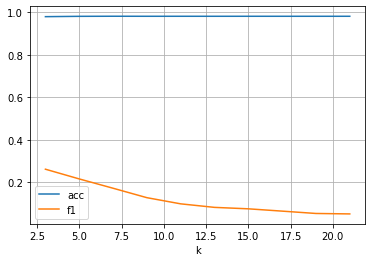

In [113]:
df_perf.set_index("k").plot.line(grid = True)

In [18]:
# 정리된 결과 예시
df_perf = pd.DataFrame({"k": [3, 5, 7],
                        "acc": [0.67, 0.65, 0.73],
                        "f1": [0.51, 0.53, 0.54]})
df_perf

k   acc    f1
0  3  0.67  0.51
1  5  0.65  0.53
2  7  0.73  0.54

### Q18. 종속변수를 STATUS로 하고 독립변수는 이진 변수와 수치형 변수만 사용하여 의사결정나무의 분류나무를 사용하고 성능을 평가하시오.
※ ID 변수는 분석에서 제외하시오.  
※ random_state 인자에 123을 할당하시오.  
※ 평가지표는 accuracy와 f1-score를 사용하시오.  

In [121]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 123)
model.fit(X = df_train.drop("STATUS2", axis = 1),
          y = df_train["STATUS2"])
pred = model.predict(df_test.drop("STATUS2", axis = 1))

perf_acc = accuracy_score(y_pred = pred, y_true = df_test["STATUS2"])
perf_f1  = f1_score(y_pred = pred, y_true = df_test["STATUS2"])

In [116]:
perf_acc

0.9761270570225794

In [117]:
perf_f1

0.23460122699386501

In [123]:
model.get_depth()

34

### Q19. 18번 문제의 지시사항을 참고하여 depth값을 변화하면서 그 성능을 평가하고 해당 결과를 데이터프레임에 저장하시오.
※ depth는 2 부터 10 까지 1씩 증가시키면서 그 결과를 기록하시오.  
※ 평가지표는 accuracy와 f1-score를 사용하시오.  

In [124]:
df_perf = pd.DataFrame()
for n in tqdm(np.arange(2, 11)):
    model = DecisionTreeClassifier(max_depth = n, random_state = 123)
    model.fit(X = df_train.drop("STATUS2", axis = 1),
              y = df_train["STATUS2"])
    pred = model.predict(df_test.drop("STATUS2", axis = 1))
    
    perf_acc = accuracy_score(y_pred = pred, y_true = df_test["STATUS2"])
    perf_f1  = f1_score(y_pred = pred, y_true = df_test["STATUS2"])
    
    df_perf_sub = pd.DataFrame(dict(depth = [n],
                                    acc = [perf_acc],
                                    f1 = [perf_f1]))
    df_perf = pd.concat([df_perf, df_perf_sub])

  0%|          | 0/9 [00:00<?, ?it/s]

In [125]:
df_perf

depth       acc        f1
0      2  0.981286  0.000000
0      3  0.981286  0.000000
0      4  0.981278  0.000000
0      5  0.981309  0.012935
0      6  0.981294  0.012126
0      7  0.981424  0.037287
0      8  0.981286  0.058529
0      9  0.981424  0.059667
0     10  0.981408  0.076777

### Q20. 17번과 19번의 결과를 참고했을 때 어떤 모델의 성능이 더 좋은지 평가하시오.

In [127]:
from sklearn.preprocessing import StandardScaler

In [133]:
nor_ss = StandardScaler()
df_train_nor = nor_ss.fit_transform(df_train.drop("STATUS2", axis = 1))

In [134]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X = df_train_nor,
          y = df_train["STATUS2"])

KNeighborsClassifier()

In [135]:
df_test_nor = nor_ss.transform(df_test.drop("STATUS2", axis = 1)) # 중요!!

In [136]:
pred = model.predict(df_test_nor)

In [137]:
accuracy_score(y_pred = pred, y_true = df_test["STATUS2"])

0.9812629161882893

In [138]:
f1_score(y_pred = pred, y_true = df_test["STATUS2"])

0.26353790613718414

In [139]:
pd.crosstab(pred, df_test["STATUS2"])

STATUS2       0     1
row_0                
0        127764  2007
1           441   438